# Reading Data

## Tample for our projects with sklearn

In [29]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import pandas as pd
import seaborn as sns

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## First method for reading the database

In [2]:
# para leer el archivo
with open('../datasets/hepatitis.dat', 'r') as lector:
    lista = lector.readlines()

In [3]:
def mostFrequent(arr):
    n = len(arr)
    # Insert all elements in Hash.
    Hash = dict()
    for i in range(n):
        if arr[i] in Hash.keys():
            Hash[arr[i]] += 1
        else:
            Hash[arr[i]] = 1
    # find the max frequency
    max_count = 0
    res = -1
    for i in Hash:
        if (max_count < Hash[i]):
            res = i
            max_count = Hash[i]
    return res

def obtienePromedio(arr):
    if(len(arr) == 0):
        return 0
    suma = 0
    for element in arr:
        suma += element
    return suma // len(arr)

In [4]:
# convertir los numeros
import numpy as np


Xt = [entrada.rstrip('\n').split(',')[:-1]for entrada in lista if not entrada.startswith('@')]

X = []

for elemento in Xt:
    tempArr = []
    for ele in elemento:
        try:
            tempArr.append(int(ele))
        except:
            tempArr.append(-100)
    X.append(tempArr)


index = 0
for i in range (len(X[0])):
    arr = []
    for fold in X:
        if (fold[i] != -100):
            arr.append(fold[i])

    ## Mandat a calcular la moda para los datos categoricos
    if(i in range(1, 13) or i == 18):
        moda = mostFrequent(arr)
        ## Substituir los -100 por la moda
        for fold in X:
            if (fold[i] == -100):
                fold[i] = moda
    elif(i in range(13,18)):
        promedio = obtienePromedio(arr)
        ## Substituir los -100 por el promedio
        for fold in X:
            if (fold[i] == -100):
                fold[i] = promedio
                
for folds in X:
    print(folds)
    
    
        
    

[30, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 85, 18, 0, 61, 1]
[50, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 0, 135, 42, 0, 61, 1]
[78, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 96, 32, 0, 61, 1]
[31, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 46, 52, 0, 80, 1]
[34, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 105, 200, 0, 61, 1]
[34, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 95, 28, 0, 75, 1]
[51, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 0, 105, 85, 0, 61, 1]
[23, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 105, 85, 0, 61, 1]
[39, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 0, 105, 48, 0, 61, 1]
[30, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 105, 120, 0, 61, 1]
[39, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 0, 78, 30, 0, 85, 1]
[32, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 0, 59, 249, 0, 54, 1]
[41, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 0, 81, 60, 0, 52, 1]
[30, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 0, 57, 144, 0, 78, 1]
[47, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 105, 60, 0, 61, 1]
[38, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 0, 72, 89, 0, 46, 

In [5]:
# para sacar y
yt = [entrada.rstrip('\n').split(',')[-1]for entrada in lista if not entrada.startswith('@')]

y = [float(i) for i in yt]
y = np.asarray(y)
print(y)

[2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 1. 1. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 1.
 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 2. 2. 1. 2. 2. 1. 2.
 2. 2. 1. 2. 1. 2. 2. 2. 1. 2. 1. 2. 2. 1. 2. 1. 2. 2. 2. 2. 2. 2. 1. 2.
 1. 2. 2. 2. 2. 2. 2. 1. 2. 1. 2. 1. 2. 2. 1. 2. 2. 2. 1. 2. 2. 1. 2. 1.
 1. 2. 1. 1. 2. 2. 1. 2. 2. 2. 1.]


## Second method for reading the database

In [27]:
# Define a function for opening the dataset
def load_dataset(file_path):
    return pd.read_csv(file_path)

In [30]:
# Open dataset for processing:
DATASET_PATH_CSV = "../datasets/hepatitis.csv"

# hepatitis dataset:
hepatitis = load_dataset(DATASET_PATH_CSV)

### Data description and preprocessing

In [31]:
hepatitis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
Age               155 non-null int64
Sex               155 non-null int64
Steroid           155 non-null int64
Antivirals        155 non-null int64
Fatigue           155 non-null int64
Malaise           155 non-null int64
Anorexia          155 non-null int64
LiverBig          155 non-null int64
LiverFirm         155 non-null int64
SpleenPalpable    155 non-null int64
Spiders           155 non-null int64
Ascites           155 non-null int64
Varices           155 non-null int64
Bilirubin         155 non-null int64
AlkPhosphate      155 non-null int64
Sgot              155 non-null int64
AlbuMin           155 non-null int64
ProTime           155 non-null int64
Histology         155 non-null int64
Class             155 non-null int64
dtypes: int64(20)
memory usage: 24.3 KB


Obtain relevant information about the dataset's datatypes, this way we can know if we have to change something within the dataset for further processing.

In [32]:
hepatitis.describe()

,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,LiverBig,LiverFirm,SpleenPalpable,Spiders,Ascites,Varices,Bilirubin,AlkPhosphate,Sgot,AlbuMin,ProTime,Histology,Class
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.0,155.000000,155.000000,155.0,155.000000,155.000000,155.000000
mean,41.200000,1.103226,1.509677,1.845161,1.348387,1.606452,1.793548,1.838710,1.612903,1.806452,1.670968,1.870968,1.883871,0.0,105.264516,85.870968,0.0,61.483871,1.451613,1.793548
std,12.565878,0.305240,0.501527,0.362923,0.478004,0.490120,0.406070,0.368991,0.488665,0.396360,0.471385,0.336322,0.321418,0.0,46.405759,88.479047,0.0,17.198745,0.499266,0.406070
min,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,26.000000,14.000000,0.0,0.000000,1.000000,1.000000
25%,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,0.0,78.000000,32.500000,0.0,57.000000,1.000000,2.000000
50%,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.0,102.000000,59.000000,0.0,61.000000,1.000000,2.000000
75%,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.0,119.500000,99.000000,0.0,65.000000,2.000000,2.000000
max,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.0,295.000000,648.000000,0.0,100.000000,2.000000,2.000000


In [33]:
# Let's see only the first entires in the dataset:
hepatitis.head()

,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,LiverBig,LiverFirm,SpleenPalpable,Spiders,Ascites,Varices,Bilirubin,AlkPhosphate,Sgot,AlbuMin,ProTime,Histology,Class
0,30,2,1,2,2,2,2,1,2,2,2,2,2,0,85,18,0,61,1,2
1,50,1,1,2,1,2,2,1,2,2,2,2,2,0,135,42,0,61,1,2
2,78,1,2,2,1,2,2,2,2,2,2,2,2,0,96,32,0,61,1,2
3,31,1,2,1,2,2,2,2,2,2,2,2,2,0,46,52,0,80,1,2
4,34,1,2,2,2,2,2,2,2,2,2,2,2,0,105,200,0,61,1,2


In [34]:
hepatitis.tail()

,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,LiverBig,LiverFirm,SpleenPalpable,Spiders,Ascites,Varices,Bilirubin,AlkPhosphate,Sgot,AlbuMin,ProTime,Histology,Class
150,46,1,2,2,1,1,1,2,2,2,1,1,1,0,105,242,0,50,2,1
151,44,1,2,2,1,2,2,2,1,2,2,2,2,0,126,142,0,61,2,2
152,61,1,1,2,1,1,2,1,1,2,1,2,2,0,75,20,0,61,2,2
153,53,2,1,2,1,2,2,2,2,1,1,2,1,0,81,19,0,48,2,2
154,43,1,2,2,1,2,2,2,2,1,1,1,2,0,100,19,0,42,2,1


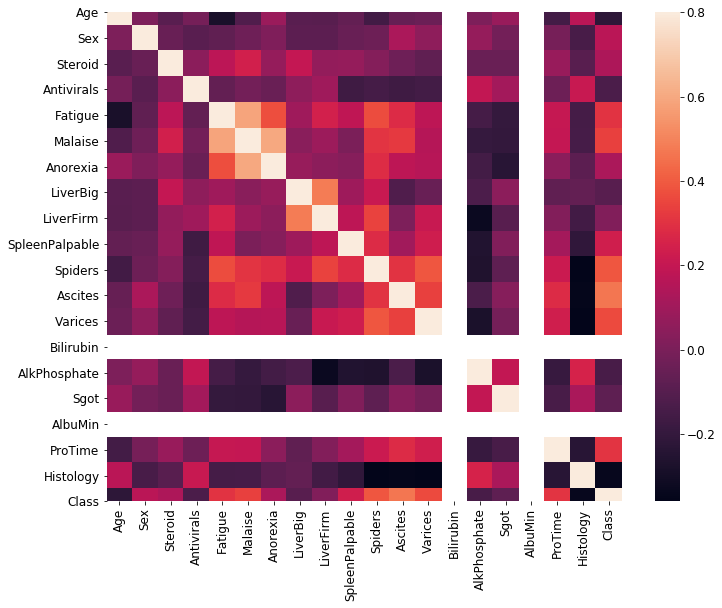

In [35]:
# Lets make a correlation matrix:
corr_matrix = hepatitis.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_matrix, vmax=.8, square=True);

In [36]:
# Correlation matrix to see what variables relate the most
corr_matrix

,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,LiverBig,LiverFirm,SpleenPalpable,Spiders,Ascites,Varices,Bilirubin,AlkPhosphate,Sgot,AlbuMin,ProTime,Histology,Class
Age,1.000000,0.008126,-0.090466,-0.013100,-0.278701,-0.117876,0.088317,-0.089629,-0.092001,-0.061277,-0.156545,-0.055314,-0.039229,NaN,0.008238,0.081030,NaN,-0.152845,0.170780,-0.219647
Sex,0.008126,1.000000,-0.048985,-0.089249,-0.070059,-0.030523,0.015886,-0.081830,-0.078642,-0.048478,-0.033192,0.130587,0.056792,NaN,0.073700,-0.017536,NaN,-0.007102,-0.137450,0.173051
Steroid,-0.090466,-0.048985,1.000000,0.043961,0.175451,0.240139,0.073644,0.201478,0.068376,0.074816,0.027290,-0.031046,-0.073548,NaN,-0.044333,-0.044018,NaN,0.084145,-0.095367,0.137413
Antivirals,-0.013100,-0.089249,0.043961,1.000000,-0.061339,-0.016251,-0.042072,0.054746,0.099213,-0.164548,-0.147909,-0.164747,-0.155148,NaN,0.197156,0.107764,NaN,-0.034733,0.209242,-0.130196
Fatigue,-0.278701,-0.070059,0.175451,-0.061339,1.000000,0.589030,0.372957,0.099759,0.247505,0.186846,0.367948,0.281439,0.180511,NaN,-0.148793,-0.199754,NaN,0.206842,-0.146579,0.306049
Malaise,-0.117876,-0.030523,0.240139,-0.016251,0.589030,1.000000,0.600545,0.041697,0.091832,0.006470,0.307173,0.320228,0.161422,NaN,-0.194957,-0.202878,NaN,0.199144,-0.144667,0.339530
Anorexia,0.088317,0.015886,0.073644,-0.042072,0.372957,0.600545,1.000000,0.079685,0.052781,0.032536,0.287366,0.184053,0.163378,NaN,-0.153184,-0.234796,NaN,0.046939,-0.081623,0.133638
LiverBig,-0.089629,-0.081830,0.201478,0.054746,0.099759,0.041697,0.079685,1.000000,0.479779,0.095959,0.215566,-0.116465,-0.049453,NaN,-0.124531,0.050275,NaN,-0.070503,-0.060262,-0.093665
LiverFirm,-0.092001,-0.078642,0.068376,0.099213,0.247505,0.091832,0.052781,0.479779,1.000000,0.180607,0.345553,0.010196,0.208047,NaN,-0.324471,-0.093076,NaN,0.022431,-0.157118,0.020057
SpleenPalpable,-0.061277,-0.048478,0.074816,-0.164548,0.186846,0.006470,0.032536,0.095959,0.180607,1.000000,0.282523,0.103709,0.230190,NaN,-0.257385,0.017985,NaN,0.114799,-0.211702,0.234261


# Models

In [6]:
# vamos a generar los conjuntos de prueba
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=42)

## Support Vector machine

#### Normal Classifier

In [7]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


# Crear maquina de soporte vectorial
poly_kernel_svm_clf=Pipeline([
    ("scaler", StandardScaler()), 
    ("SVM", SVC(kernel="poly", degree=3, C=5))])
poly_kernel_svm_clf.fit(X_train,y_train)

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('SVM',
                 SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [8]:
# para predecir los test con poly_kernel_svm_clf
y_pred1=poly_kernel_svm_clf.predict(X_test)

#### Best configuration for the classifier

In [9]:
from sklearn.model_selection import GridSearchCV
param_grid = [
  {'C': [1,10], 'kernel': ['linear', 'poly']},
  {'C': [1, 10, 20], 'gamma': [0.001, 0.0001], 'kernel': ['rbf', 'poly']},
 ]
parameteres = {'SVM__C':[0.001,0.1,10,100,10e5], 'SVM__gamma':[0.1,0.01]}
bestClfSVM = GridSearchCV(poly_kernel_svm_clf, param_grid = parameteres, cv = 5)

bestClfSVM.fit(X_train,y_train)
print(bestClfSVM.best_estimator_)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('SVM',
                 SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=0.1,
                     kernel='poly', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)


/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [10]:
# para predecir los test con bestClfSVM
y_pred2=bestClfSVM.predict(X_test)

In [11]:
###### Vamos a generar los resultados
from sklearn.metrics import accuracy_score

#Maquina de soporte vectorial con grado 3
result1SVM=accuracy_score(y_test,y_pred1)
print("The Accuracy for SVM with degree 3 is:" + str(result1SVM))


result2SVM=accuracy_score(y_test,y_pred2)
print("The Accuracy for SVM with GridSearch is:" + str(result2SVM))

The Accuracy for SVM with degree 3 is:0.7435897435897436
The Accuracy for SVM with GridSearch is:0.717948717948718


## Perceptron Multilayer

#### Normal Classifier

In [12]:
from sklearn.neural_network import MLPClassifier

clf_perceptron = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(6,), random_state=1,activation='relu')
clf_perceptron.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(6,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [13]:
# para predecir los test con poly_kernel_svm_clf
y_pred1_perceptron = clf_perceptron.predict(X_test)

#### Best configuration for the classifier

In [14]:
params = {'activation': ['identity', 'logistic', 'tanh', 'relu'],
          'solver': ['lbfgs', 'sgd', 'adam'],
          'learning_rate_init': [.1,.05,.01,.005,.001]}
clf_grid_search_perceptron = GridSearchCV(
    MLPClassifier(random_state=42), params, verbose=1, cv=3)

clf_grid_search_perceptron.fit(X_train, y_train)
print(clf_grid_search_perceptron.best_estimator_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 60 candidates, totalling 180 fits


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr

/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.005, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=42, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   17.1s finished
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [15]:
## Accuracy score for the best configuration calculated with grid_search_cv
y_pred2_perceptron = clf_grid_search_perceptron.predict(X_test)

In [16]:
###### Vamos a generar los resultados
from sklearn.metrics import accuracy_score

result1MLP=accuracy_score(y_test, y_pred1_perceptron)
print("The Accuracy for MLP: " + str(result1MLP))


result2MLP=accuracy_score(y_test, y_pred2_perceptron)
print("The Accuracy for MLP with GridSearch is: " + str(result2MLP))

The Accuracy for MLP: 0.7692307692307693
The Accuracy for MLP with GridSearch is: 0.8205128205128205


## Stochastic Gradient Descent

#### Normal Classifier

In [17]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [18]:
# para predecir los test con sgd_clf
y_pred1_SGD = sgd_clf.predict(X_test)

#### Best configuration for the classifier

In [19]:
params = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
          "penalty": ["none", "l1", "l2"]}

clf_grid_search_sgd = GridSearchCV(sgd_clf, params)

clf_grid_search_sgd.fit(X_train, y_train)
print(clf_grid_search_sgd.best_estimator_)

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn

SGDClassifier(alpha=10, average=False, class_weight=None, early_stopping=False,
              epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
              learning_rate='optimal', loss='hinge', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l1', power_t=0.5,
              random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/

In [20]:
## Accuracy score for the best configuration calculated with clf_grid_search_sgd
y_pred2_SGD = clf_grid_search_sgd.predict(X_test)

In [21]:
###### Vamos a generar los resultados
from sklearn.metrics import accuracy_score

result1SGD=accuracy_score(y_test, y_pred1_SGD)
print("The Accuracy for SGD: " + str(result1MLP))


result2SGD=accuracy_score(y_test, y_pred2_SGD)
print("The Accuracy for SGD with GridSearch is: " + str(result2MLP))

The Accuracy for SGD: 0.7692307692307693
The Accuracy for SGD with GridSearch is: 0.8205128205128205


## KMeans classifier

#### Normal Classifier

In [22]:
from sklearn.cluster import KMeans

kmeans_clf = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=42, copy_x=True, n_jobs=None, algorithm='auto')
kmeans_clf.fit(X_train, y_train)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [23]:
# para predecir los test con kmeans_clf
y_pred1_KM = kmeans_clf.predict(X_test)

#### Best configuration for the classifier

In [24]:
from sklearn.model_selection import GridSearchCV

params = {"n_clusters": range(2, 10)}

clf_grid_search_KM = GridSearchCV( 
    KMeans(random_state=42), params, verbose=1, cv=3 ) 

clf_grid_search_KM.fit(X_train, y_train)

print(clf_grid_search_KM.best_estimator_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)


[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    1.2s finished
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [25]:
## Accuracy score for the best configuration calculated with clf_grid_search_KM
y_pred2_KM = clf_grid_search_KM.predict(X_test)

In [26]:
###### Vamos a generar los resultados
from sklearn.metrics import accuracy_score

result1KM=accuracy_score(y_test, y_pred1_KM)
print("The Accuracy for KMeans: " + str(result1MLP))


result1KM=accuracy_score(y_test, y_pred2_KM)
print("The Accuracy for Kmeans with GridSearch is: " + str(result2MLP))

The Accuracy for KMeans: 0.7692307692307693
The Accuracy for Kmeans with GridSearch is: 0.8205128205128205
